<a href="https://colab.research.google.com/github/RostislavB74/DS_HW3/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завдання**

Напишіть функцію гіпотези лінійної регресії у векторному вигляді;

Створіть функцію для обчислення функції втрат у векторному вигляді;

Реалізуйте один крок градієнтного спуску;

Знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

Знайдіть ці ж параметри за допомогою аналітичного рішення;

Порівняйте отримані результати.

**1. Підготовка**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib as mpl

df_house=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

list(df_house.head())

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [3]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing_values = df_house.isnull().sum()
# Підрахунок частки пропущених значень в кожній колонці
total_rows = len(df_house)
missing_percentage = (missing_values / total_rows) * 100
# Виведемо результати
print("Кількість пропусків в кожній колонці:")
# print(missing_percentage.round(2))
missing_values

Кількість пропусків в кожній колонці:


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [15]:
df_house

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df_house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: >

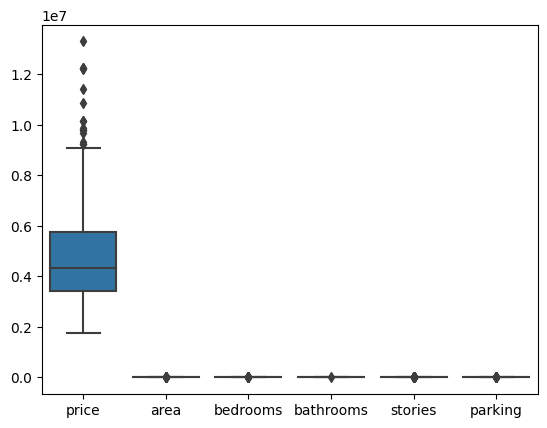

In [13]:
import seaborn as sns
sns.boxplot(data=df_house)


In [12]:
df_house.describe().round(2)


,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [11]:
df_house.shape


(545, 13)

Exploratory Data Analysis

**Матриця кореляцій**

In [10]:
df_corr=df_house.corr().round(2)
df_corr

<ipython-input-10-752a4460c1ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df_house.corr().round(2)


,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


In [165]:
import scipy.stats as st
np.round(st.pearsonr(df_house['price'], df_house['area'])[0], 2)

0.54

In [166]:
x1= df_house['area']
x2=df_house['bathrooms']
y=df_house['price']

Text(0.5, 1.0, 'Ціни на житло в залежності від загальної площі будівлі коеф. корел. 0.54')

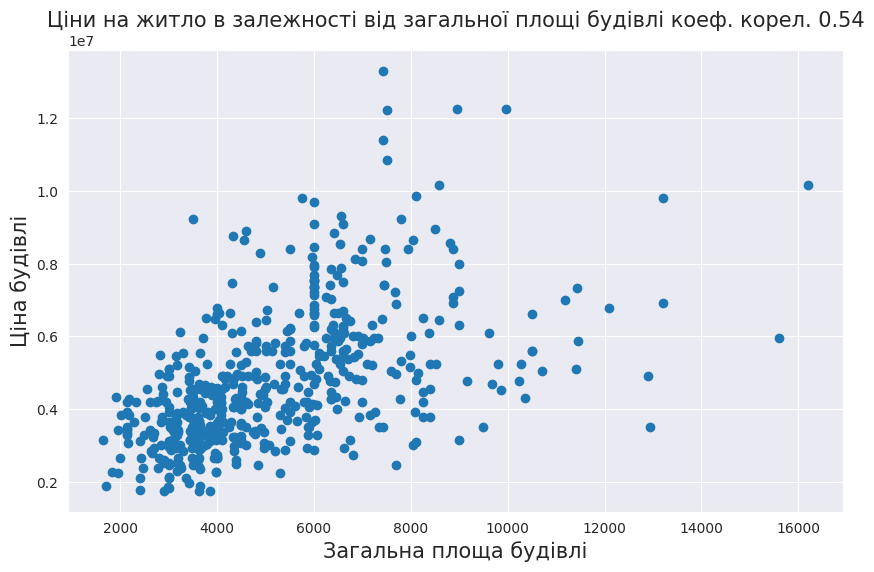

In [167]:
plt.figure(figsize=(10,6))
plt.scatter(x1, y)

plt.xlabel('Загальна площа будівлі', fontsize=15)
plt.ylabel('Ціна будівлі', fontsize=15)
plt.title(f'Ціни на житло в залежності від загальної площі будівлі коеф. корел. {df_corr.price.area}', fontsize=15)

Text(0.5, 1.0, 'Ціни на житло в залежності від кількості ваних кімнат коеф. корел. 0.52')

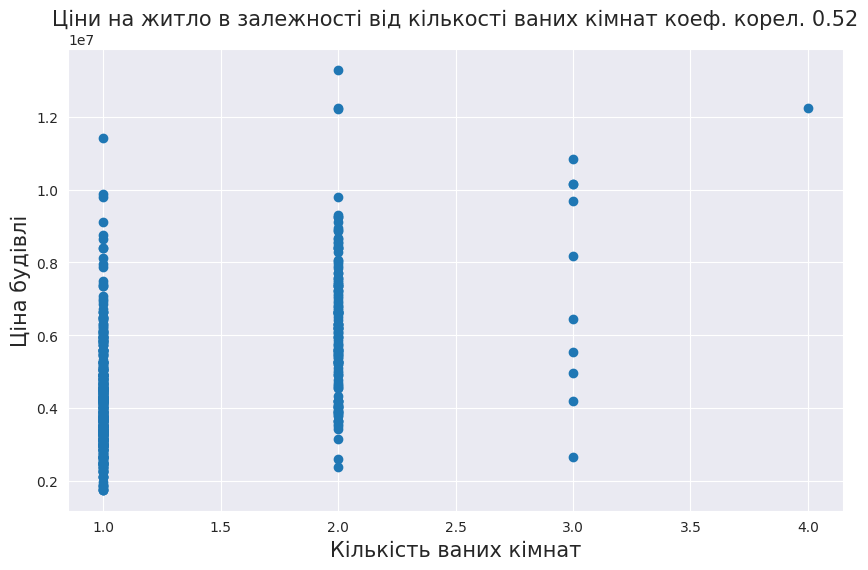

In [168]:
plt.figure(figsize=(10,6))
plt.scatter(x2, y)

plt.xlabel('Кількість ваних кімнат', fontsize=15)
plt.ylabel('Ціна будівлі', fontsize=15)
plt.title(f'Ціни на житло в залежності від кількості ваних кімнат коеф. корел. {df_corr.price.bathrooms}', fontsize=15)

<Axes: xlabel='area', ylabel='price'>

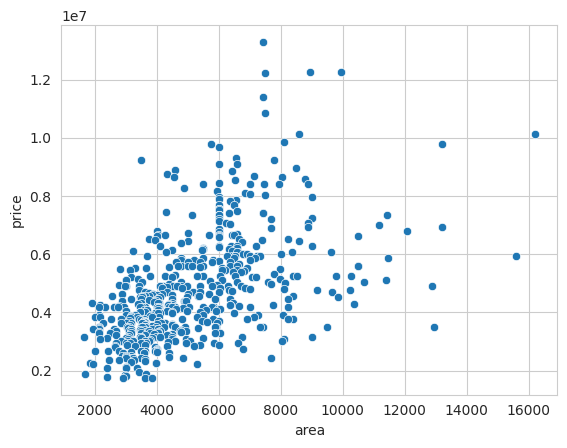

In [169]:
sns.set_style("whitegrid")
sns.scatterplot(x='area', y='price', data=df_house)

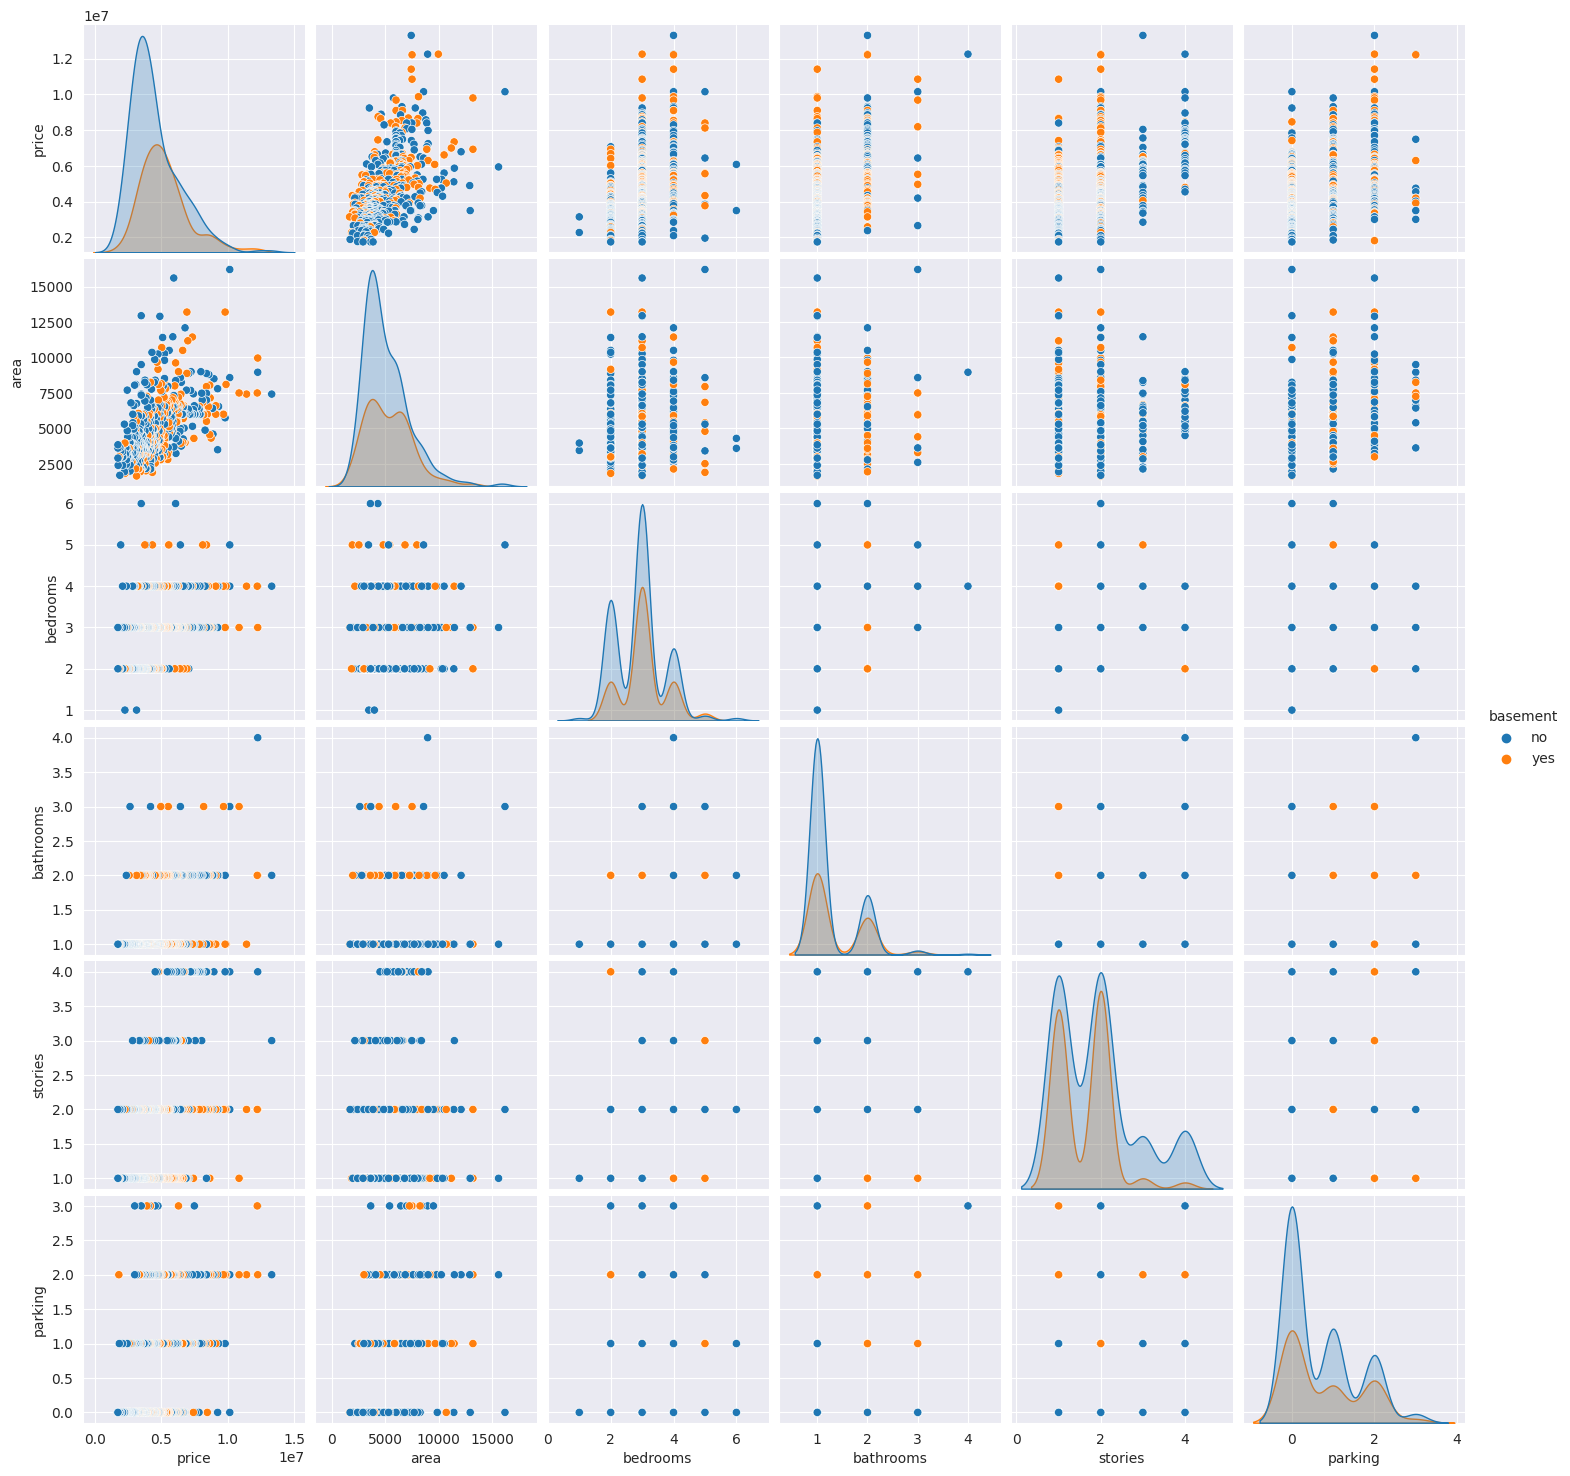

In [170]:
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_style("darkgrid")
sns.pairplot(df_house,
             vars=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
             hue= 'basement')
plt.show()

Text(0.5, 1.0, 'Залежність ціни будинків від площі')

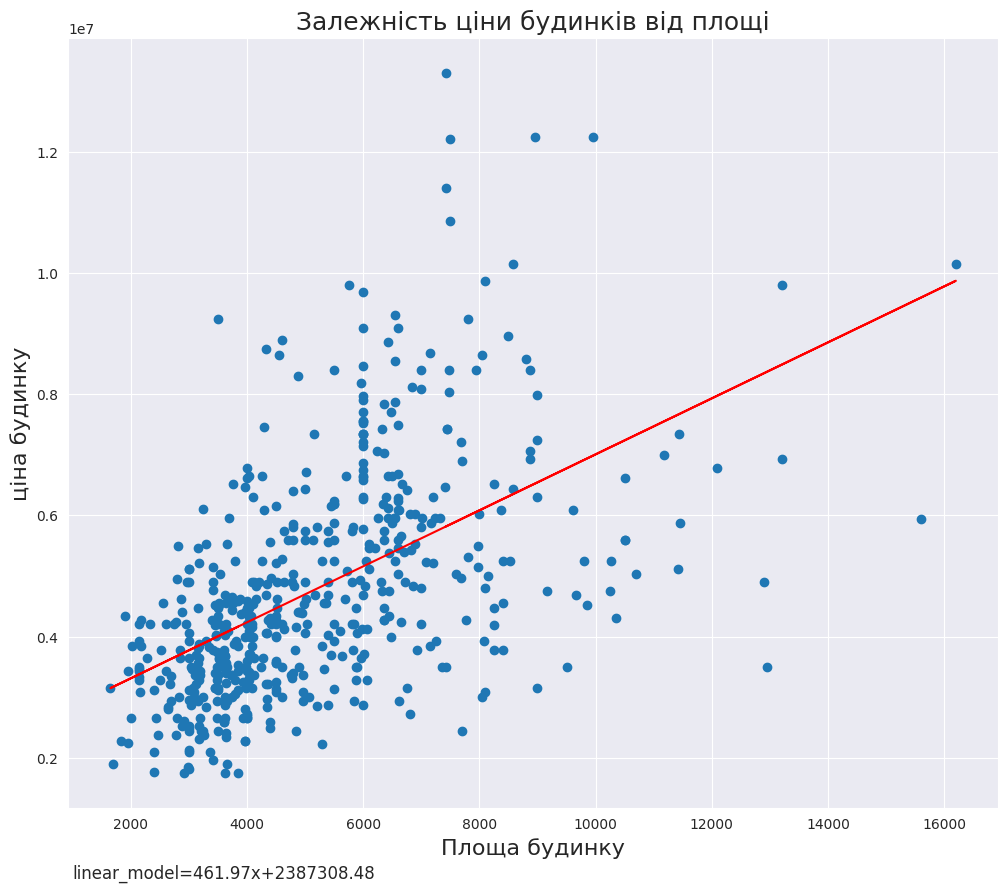

In [171]:
X = x1
y = y

plt.figure(figsize = (12,10))

plt.scatter(X, y)
#МНК
slope, intercept = np.polyfit(X, y, 1)

plt.plot(X, X * slope + intercept, 'r')

plt.text(1000, 5000, f'linear_model={slope:.2f}x+{intercept:.2f}', fontsize=12)
plt.xlabel('Площа будинку', fontsize = 16)
plt.ylabel('ціна будинку', fontsize = 16)
plt.title('Залежність ціни будинків від площі', fontsize = 18)

Прогноз ціна на будинок площею 10000м2

In [173]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 545 entries, 0 to 544
Series name: price
Non-Null Count  Dtype
--------------  -----
545 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [174]:
new_area=10000

Ціна на будинок


In [175]:
np.round( slope* new_area + intercept, 2)

7007057.43

In [176]:
XX=df_house[['area', 'bedrooms', 'bathrooms']]

In [140]:
X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [177]:
yy=df_house['price']


linear regression Лінійна регресія

$$h(x)=w_0+w_1*x$$


h($\vec x$)=$\vec w$⋅$\vec x$




In [178]:
def hypothesis(w, X):
    """
    w: вектор параметрів регресії (w0, w1, w2, ...)
    X: матриця ознак з розмірністю (m, n), де m - кількість прикладів, n - кількість ознак
    Повертає вектор прогнозованих значень
    """
    return np.dot(X, w)

In [179]:
def cost_func(w, X, y):
    """
    w: вектор параметрів регресії (w0, w1, w2, ...)
    X: матриця ознак з розмірністю (m, n), де m - кількість прикладів, n - кількість ознак
    y: вектор цільових значень розмірністю (m, 1), де m - кількість прикладів
    Повертає значення функції втрат (середньоквадратична помилка)
    """
    m = len(y)
    h = hypothesis(w, X)
    error = h - y
    return np.sum(error ** 2) / (2 * m)

In [243]:
features = ['area']
target = 'price'
X = df_house[features]
y = df_house[target]

model = LinearRegression()
model.fit(X, y)

print(f'Intercept from scikit-learn: {model.intercept_}')
print(f'Coefficients from scikit-learn: {model.coef_}')

Intercept from scikit-learn: 2387308.48239643
Coefficients from scikit-learn: [461.97489427]


In [244]:
y.shape

(545,)

In [245]:
X.shape

(545, 1)

In [246]:
features = ['area', 'bathrooms', 'bedrooms']
target = 'price'
X3 = df_house[features]
y3 = df_house[target]

model1 = LinearRegression()
model1.fit(X3, y3)

print(f'Intercept from scikit-learn: {model1.intercept_}')
print(f'Coefficients from scikit-learn: {model1.coef_}')

Intercept from scikit-learn: -173171.60763263796
Coefficients from scikit-learn: [3.78762754e+02 1.38604950e+06 4.06820034e+05]


In [247]:
X.shape

(545, 1)

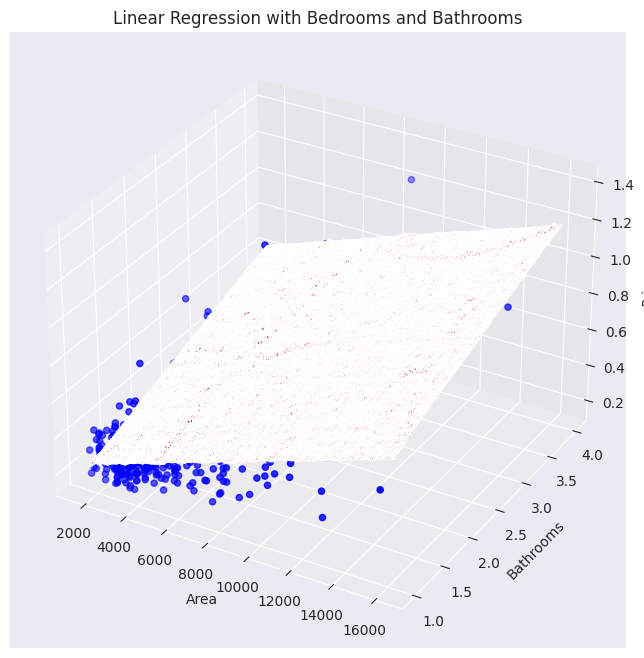

In [187]:
from mpl_toolkits.mplot3d import Axes3D


x_values = np.linspace(min(X3['area']), max(X3['area']), 100)
bathrooms_values = np.linspace(min(df_house['bathrooms']), max(df_house['bathrooms']), 100)
bedrooms_values = np.linspace(min(df_house['bedrooms']), max(df_house['bedrooms']), 100)


x, bathrooms, bedrooms = np.meshgrid(x_values, bathrooms_values, bedrooms_values)


y_values = model1.intercept_ + model1.coef_[0] * x + model1.coef_[1] * bathrooms + model1.coef_[2] * bedrooms


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['area'], df_house['bathrooms'], y, color='blue', label='Actual data')
ax.plot_trisurf(x.flatten(), bathrooms.flatten(), y_values.flatten(), color='red', alpha=0.5)
ax.set_xlabel('Area')
ax.set_ylabel('Bathrooms')
ax.set_zlabel('Price')
ax.set_title('Linear Regression with Bedrooms and Bathrooms')
plt.show()




In [248]:
X_1=X['area']
y_1=y

In [249]:
# y_1.shape

In [250]:
# X.shape

In [251]:
# X_1_trans=X_1.T

In [252]:
# X_1_trans.shape

In [253]:
# XT=X_1_trans.T

In [254]:
# XT.shape

In [255]:
y_1.shape

(545,)

In [256]:
# Додаємо X0=1
X2 = np.hstack((np.ones((X.shape[0], 1)), X))
# МНК
w = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y_1)

print(f'Зсув: {w[0]}')
print(f'Нахил: {w[1:]}')

Зсув: 2387308.4823964285
Нахил: [461.97489427]


In [257]:
# X_22T=X_22.T

In [258]:
# X_22T.shape

In [155]:
# wT=w.T

In [259]:
# wT.shape

In [261]:
def gradient_descent_step(w, X, y, learning_rate=0.000001):
    """
    w: вектор параметрів регресії (w0, w1, w2, ...)
    X: матриця ознак з розмірністю (m, n), де m - кількість прикладів, n - кількість ознак
    y: вектор цільових значень розмірністю (m, 1), де m - кількість прикладів
    learning_rate: коефіцієнт навчання (learning rate)
    Повертає оновлений вектор параметрів регресії після одного кроку градієнтного спуску
    """
    m = len(y)
    h = hypothesis(w, X)
    error = h - y
    gradient = np.dot(X.T, error) / m
    w = w - learning_rate * gradient
    return w

In [262]:
weights = gradient_descent_step((0.,0.), X2 , y_1, learning_rate=0.0001)
print(weights)

[4.76672925e+02 2.67229201e+06]


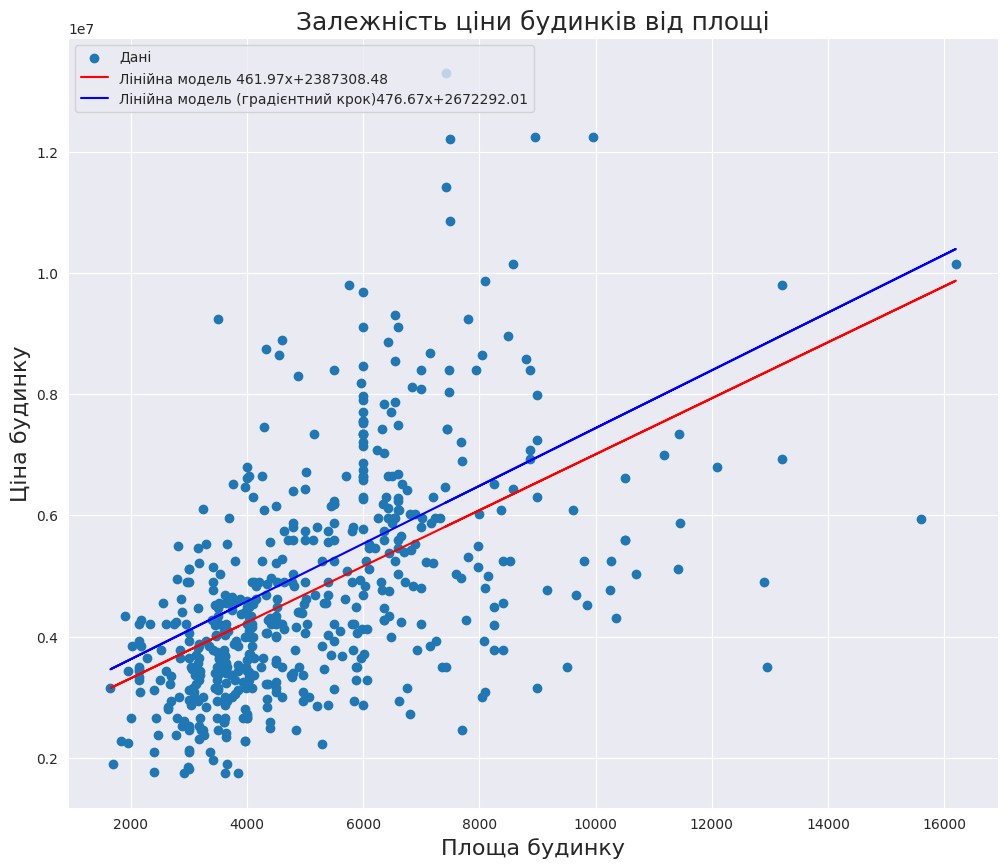

In [263]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))

plt.scatter(X, y, label='Дані')

plt.plot(X, X * slope + intercept, 'r', label=f'Лінійна модель {slope:.2f}x+{intercept:.2f}')
plt.plot(X, X * weights[0] + weights[1], 'b', label=f'Лінійна модель (градієнтний крок){weights[0]:.2f}x+{weights[1]:.2f}')



plt.legend(loc='upper left')
plt.xlabel('Площа будинку', fontsize=16)
plt.ylabel('Ціна будинку', fontsize=16)
plt.title('Залежність ціни будинків від площі', fontsize=18)

plt.show()


In [264]:
X_area = df_house.area
X_bedrooms = df_house.bedrooms
X_bathrooms= df_house.bathrooms
X_parking= df_house.parking
y_ml = df_house.price
model = LinearRegression()
X33 = np.column_stack((X_area, X_bedrooms, X_bathrooms, X_parking))
result=model.fit(X33, y_ml)

house_area = 5000
house_bedrooms = 4
house_bathrooms=2
house_parking= 3
predicted_price = model.predict(np.array([[house_area, house_bedrooms, house_bathrooms, house_parking]]))
print(f'Передбачена ціна для будинку площею {house_area} кв. метрів, {house_bedrooms} спальнями, {house_bathrooms} ванними та {house_parking} місцями для паркування: ${predicted_price[0]:.2f}')

Передбачена ціна для будинку площею 5000 кв. метрів, 4 спальнями, 2 ванними та 3 місцями для паркування: $6882190.06


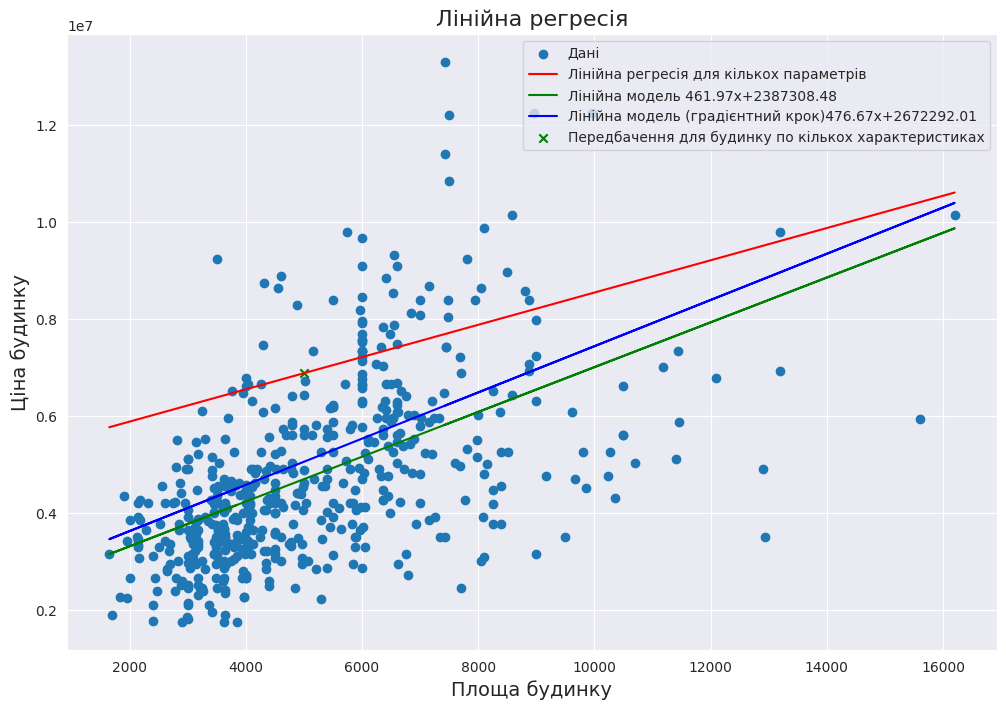

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


X_area = df_house.area
X_bedrooms = df_house.bedrooms
X_bathrooms = df_house.bathrooms
X_parking = df_house.parking
y_ml = df_house.price

X333 = np.column_stack((X_area, X_bedrooms, X_bathrooms, X_parking))

model = LinearRegression()
result = model.fit(X333, y_ml)


plt.figure(figsize=(12, 8))


house_area = 5000
house_bedrooms = 4
house_bathrooms = 2
house_parking = 3

x_values = np.linspace(X_area.min(), X_area.max(), 100).reshape(-1, 1)
X_new = np.column_stack((x_values, np.full_like(x_values, house_bedrooms),
                         np.full_like(x_values, house_bathrooms),
                         np.full_like(x_values, house_parking)))

y_pred = model.predict(X_new)

# Графік лінійної регресії
plt.scatter(X_area, y_ml, label='Дані')
plt.plot(x_values, y_pred, 'r', label='Лінійна регресія для кількох параметрів')
plt.plot(X, X * slope + intercept, 'g', label=f'Лінійна модель {slope:.2f}x+{intercept:.2f}')
plt.plot(X, X * weights[0] + weights[1], 'b', label=f'Лінійна модель (градієнтний крок){weights[0]:.2f}x+{weights[1]:.2f}')

plt.scatter([house_area], predicted_price, color='green', marker='x', label='Передбачення для будинку по кількох характеристиках')

plt.legend()
plt.xlabel('Площа будинку', fontsize=14)
plt.ylabel('Ціна будинку', fontsize=14)
plt.title('Лінійна регресія', fontsize=16)

plt.show()
